In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import streamlit as st
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [38]:
df = pd.read_csv("kc_house_data.cleaning.csv")
pd.options.display.max_columns = 40
df.shape

(21613, 21)

In [39]:
#msno.matrix(df)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df.rename(columns={
    "price" : "prix", 
    "bedrooms" : "chambres",
    "bathrooms" : "salle_de_bain",
    "sqft_living" : "m2_habitable",
    "sqft_lot" : "m2_parcelle",
    "floors" : "etages",
    "waterfront" : "vue_mer",
    "view" : "vue",
    "grade" : "note",
    "sqft_above" : "m2_etage",
    "sqft_basement" : "m2_cave",
    "yr_built" : "annee_construction",
    "yr_renovated" : "annee_renovation",
    "zipcode" : "cp",
    "long" : "lon",
    "sqft_living15" : "m2_habitable15",
    "sqft_lot15" : "m2_parcelle15"
},
        inplace=True)
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
#df.to_csv("donnees_map.csv")
#df.to_csv("kc_house_data.preparation.csv")

In [60]:
#df.drop(df.id)
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df.describe()

,id,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
#df.loc[:, df.isna().any()]

In [47]:
#df.loc[~(df["chambres"] == 0).all(axis=1)]
#df.loc[(df!=0).any(axis=1)]
#df.drop([1, 2, 3], axis=0)
#df.drop(df[df.chambres < 1].chambres, inplace = True)
df.loc[df["chambres"] >= 1]

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [45]:
df.shape

(21613, 21)

<AxesSubplot:>

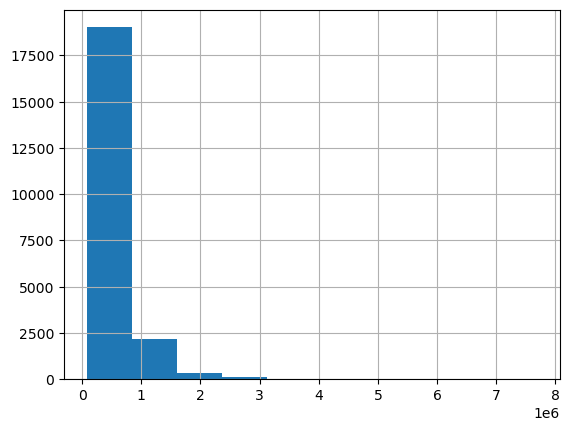

In [48]:
df["prix"].hist()

In [50]:
df["prix"].shape

(21613,)

In [51]:
df["m2_parcelle"].shape

(21613,)

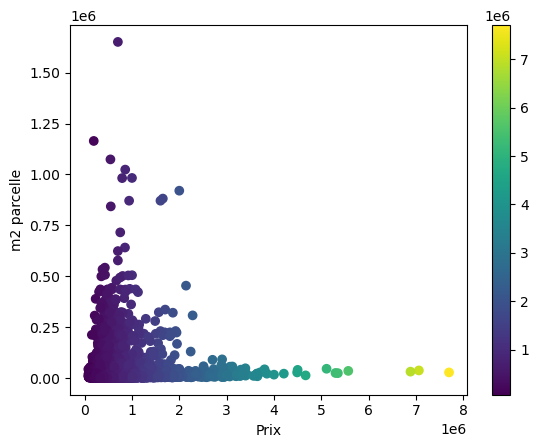

In [54]:
plt.scatter(df["prix"], df["m2_parcelle"], c=df["prix"])
plt.xlabel("Prix")
plt.ylabel("m2 parcelle")
plt.colorbar()